In [1]:
import numpy as np
from scipy.special import xlogy
import matplotlib.pyplot as plt

# Example 1
## Least confidence uncertainty

In [2]:
def cross_entropy(p, q):
    return -(xlogy(p, q) + xlogy(1.0 - p, 1.0 - q))
def entropy(q):
    return cross_entropy(q, q)

In [3]:
def surrogate_loss_1_least_confidence(p, q):
    result = np.zeros(shape = q.shape)
    index = q <= 0.5
    result[index] = -(1.0 - p) * np.log(2.0 * (1.0 - q[index])) - q[index]
    index = q > 0.5
    result[index] = -p * np.log(2.0 * q[index]) - (1.0 - q[index])
    return result

In [34]:
def optimal_estimation_1_least_confidence(p):
    return 2 * p - 1.0

In [39]:
def min_loss_1_least_confidence(p):
    result = np.zeros(shape = p.shape)
    index = p >= 0.5
    result[index] = p[index] - 0.5 - np.log(2) * p[index] - xlogy(p[index], p[index])
    index = p < 0.5
    result[index] = 0.5 - p[index] - np.log(2) * (1.0 - p[index]) - xlogy(1.0 - p[index], 1.0 - p[index])
    return result - result.min()

In [31]:
def link_func_1_least_confidence(z):
    return -0.5 * z + 0.5 * xlogy(z + 1.0, z + 1.0)

In [194]:
hat_y_grid = np.linspace(-1.0, 1.0, 200 + 1)
q_grid = 0.5 * (hat_y_grid + 1)
p_grid = np.linspace(0.0, 1.0, 200 + 1)

In [195]:
loss_1_least_confidence_p10 = surrogate_loss_1_least_confidence(1.0, q_grid)
loss_1_least_confidence_p10 -= loss_1_least_confidence_p10.min()
loss_1_least_confidence_p00 = surrogate_loss_1_least_confidence(0.0, q_grid)
loss_1_least_confidence_p00 -= loss_1_least_confidence_p00.min()
p = 0.3
loss_1_least_confidence_p03 = p * loss_1_least_confidence_p10 + (1 - p) * loss_1_least_confidence_p00
p = 0.7
loss_1_least_confidence_p07 = p * loss_1_least_confidence_p10 + (1 - p) * loss_1_least_confidence_p00

In [196]:
opt_est_1_least_confidence = optimal_estimation_1_least_confidence(p_grid)
H_1_least_confidence = min_loss_1_least_confidence(p_grid)
psi_1_least_confidence = link_func_1_least_confidence(p_grid)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


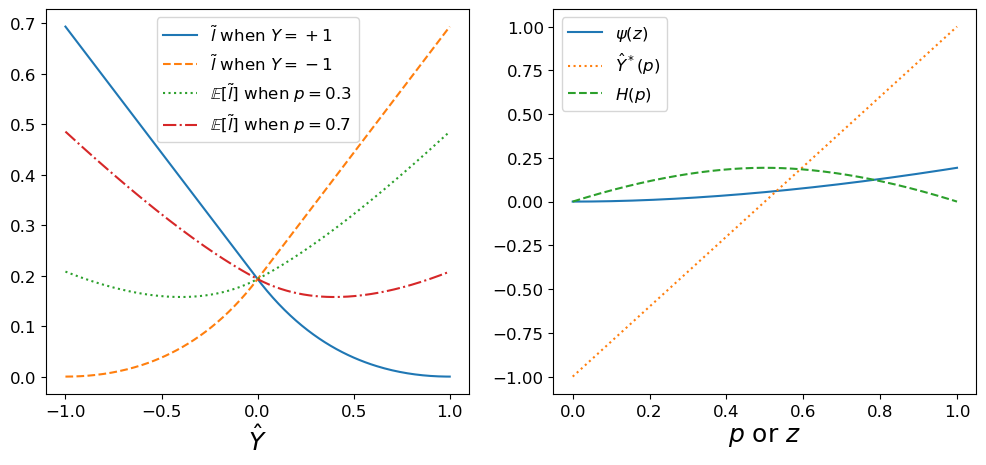

In [197]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.plot(hat_y_grid, loss_1_least_confidence_p10, label = r'$\tilde{l}$ when $Y=+1$', linestyle = 'solid')
ax1.plot(hat_y_grid, loss_1_least_confidence_p00, label = r'$\tilde{l}$ when $Y=-1$', linestyle = 'dashed')
ax1.plot(hat_y_grid, loss_1_least_confidence_p03, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.3$', linestyle = 'dotted')
ax1.plot(hat_y_grid, loss_1_least_confidence_p07, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.7$', linestyle = 'dashdot')
ax2.plot(p_grid, psi_1_least_confidence, label = r'$\psi(z)$', linestyle = 'solid')
ax2.plot(p_grid, opt_est_1_least_confidence, label = r'$\hat{Y}^*(p)$', linestyle = 'dotted')
ax2.plot(p_grid, H_1_least_confidence, label = r'$H(p)$', linestyle = 'dashed')


ax1.legend(fontsize=12)
ax1.set_xlabel(r'$\hat{Y}$', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)
ax2.legend(fontsize=12)
ax2.set_xlabel(r'$p$ or $z$', fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=12)

plt.savefig("LeastConfidence.jpg", bbox_inches='tight')
plt.savefig("LeastConfidence.eps", bbox_inches='tight')
plt.show()

## Entropy uncertainty

In [50]:
from scipy.special import spence
def surrogate_loss_1_entropy(p, q):
    return xlogy(q, q) + xlogy(1.0 - q, 1.0 - q) - (1 - p) * spence(q) - p * spence(1 - q)

In [3]:
def logistic(s):
    return np.divide(1.0, 1.0 + np.exp(-s))

In [53]:
def optimal_estimation_1_entropy(p):
    return 2 * p - 1.0

In [58]:
def min_loss_1_entropy(p):
    result = xlogy(p, p) + xlogy(1.0 - p, 1.0 - p) - (p * spence(1.0 - p) + (1.0 - p) * spence(p))
    return result - result.min()

In [59]:
def link_func_1_entropy(z):
    return 0.5 * (1.0 + z) * spence(0.5 * (1.0 - z)) + 0.5 * (1.0 - z) * spence(0.5 * (1.0 + z)) - spence(0.5) - 0.5 * (xlogy(1.0 + z, 1.0 + z) + xlogy(1.0 - z, 1.0 - z))

In [198]:
hat_y_grid = np.linspace(-1.0, 1.0, 200 + 1)
q_grid = 0.5 * (hat_y_grid + 1)
p_grid = np.linspace(0.0, 1.0, 200 + 1)

In [199]:
loss_1_entropy_p10 = surrogate_loss_1_entropy(1.0, q_grid)
loss_1_entropy_p10 -= loss_1_entropy_p10.min()
loss_1_entropy_p00 = surrogate_loss_1_entropy(0.0, q_grid)
loss_1_entropy_p00 -= loss_1_entropy_p00.min()
p = 0.3
loss_1_entropy_p03 = p * loss_1_entropy_p10 + (1 - p) * loss_1_entropy_p00
p = 0.7
loss_1_entropy_p07 = p * loss_1_entropy_p10 + (1 - p) * loss_1_entropy_p00

In [200]:
opt_est_1_entropy = optimal_estimation_1_entropy(p_grid)
H_1_entropy = min_loss_1_entropy(p_grid)
psi_1_entropy = link_func_1_entropy(p_grid)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


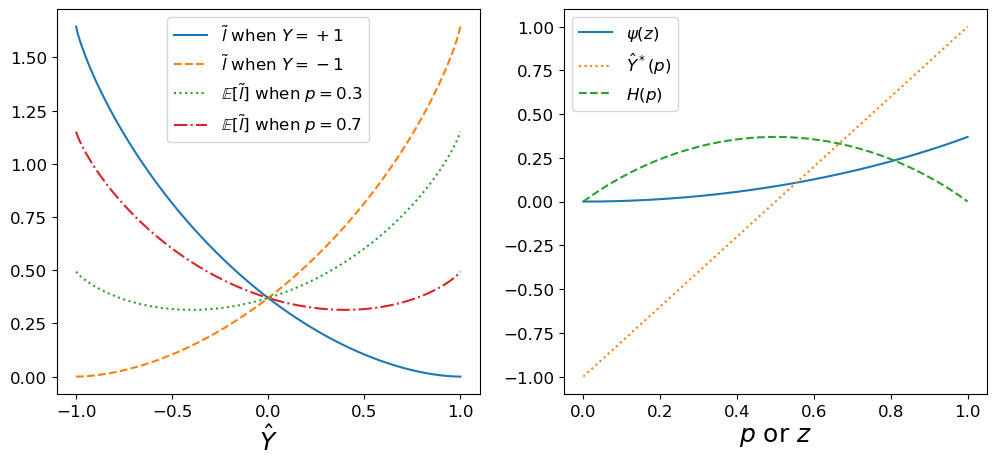

In [201]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.plot(hat_y_grid, loss_1_entropy_p10, label = r'$\tilde{l}$ when $Y=+1$', linestyle = 'solid')
ax1.plot(hat_y_grid, loss_1_entropy_p00, label = r'$\tilde{l}$ when $Y=-1$', linestyle = 'dashed')
ax1.plot(hat_y_grid, loss_1_entropy_p03, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.3$', linestyle = 'dotted')
ax1.plot(hat_y_grid, loss_1_entropy_p07, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.7$', linestyle = 'dashdot')

ax2.plot(p_grid, psi_1_entropy, label = r'$\psi(z)$', linestyle = 'solid')
ax2.plot(p_grid, opt_est_1_entropy, label = r'$\hat{Y}^*(p)$', linestyle = 'dotted')
ax2.plot(p_grid, H_1_entropy, label = r'$H(p)$', linestyle = 'dashed')


ax1.legend(fontsize=12)
ax1.set_xlabel(r'$\hat{Y}$', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)
ax2.legend(fontsize=12)
ax2.set_xlabel(r'$p$ or $z$', fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=12)

plt.savefig("Entropy.jpg", bbox_inches='tight')
plt.savefig("Entropy.eps", bbox_inches='tight')
plt.show()

# Example 2 Raj and Bach 2022

In [67]:
def surrogate_loss_2(score, mu):
    result = np.zeros(shape = score.shape)
    C = (1.0/mu + 1.0/(mu * mu)) * np.log(1.0 + mu) - 1.0/mu
    index = score > 0
    result[index] = 2 * (-(1.0 + 1.0/mu)/mu * np.log(1.0 + mu * score[index]) + score[index] / mu + C)
    index = score <= 0
    result[index] = 2 * ((1.0 - 1.0/mu)/mu * np.log(1.0 - mu * score[index]) - score[index] / mu + C)
    result[score >= 1] = 0
    return result

In [73]:
def optimal_estimation_2(p, mu):
    return 2 * p - 1.0

In [71]:
def min_loss_2(p, mu):
    C = (1.0/mu + 1.0/(mu * mu)) * np.log(1.0 + mu) - 1.0/mu
    C *= 2.0
    result = np.zeros(shape = p.shape)
    index = p >= 0.5
    tmp1 = -(2.0 / mu / mu + 2.0 / mu) * np.log(1.0 + mu * (2.0 * p - 1.0)) + 2.0 / mu * (2.0 * p - 1.0)
    tmp2 = -(2.0 / mu / mu - 2.0 / mu) * np.log(1.0 + mu * (2.0 * p - 1.0)) + 2.0 / mu * (2.0 * p - 1.0)
    result[index] = C + np.multiply(p[index], tmp1[index]) + np.multiply((1.0 - p)[index], tmp2[index])
    index = p < 0.5
    tmp1 = -(2.0 / mu / mu - 2.0 / mu) * np.log(1.0 - mu * (2.0 * p - 1.0)) - 2.0 / mu * (2.0 * p - 1.0)
    tmp2 = -(2.0 / mu / mu + 2.0 / mu) * np.log(1.0 - mu * (2.0 * p - 1.0)) - 2.0 / mu * (2.0 * p - 1.0)
    result[index] = C + np.multiply(p[index], tmp1[index]) + np.multiply((1.0 - p)[index], tmp2[index])
    return result - result.min()

In [72]:
def link_func_2(z, mu):
    return 2.0 / mu / mu * xlogy(1.0 + mu * z, 1.0 + mu * z) - 2.0 / mu * z

In [202]:
hat_y_grid = np.linspace(-2.0, 2.0, 400 + 1)
p_grid = np.linspace(0.0, 1.0, 200 + 1)

In [203]:
mu = 0.5
loss_2_p10 = surrogate_loss_2(1.0 * hat_y_grid, mu)
loss_2_p10 -= loss_2_p10.min()
loss_2_p00 = surrogate_loss_2(-1.0 * hat_y_grid, mu)
loss_2_p00 -= loss_2_p00.min()
p = 0.3
loss_2_p03 = p * loss_2_p10 + (1 - p) * loss_2_p00
p = 0.7
loss_2_p07 = p * loss_2_p10 + (1 - p) * loss_2_p00

In [204]:
opt_est_2 = optimal_estimation_2(p_grid, mu)
H_2 = min_loss_2(p_grid, mu)
psi_2 = link_func_2(p_grid, mu)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


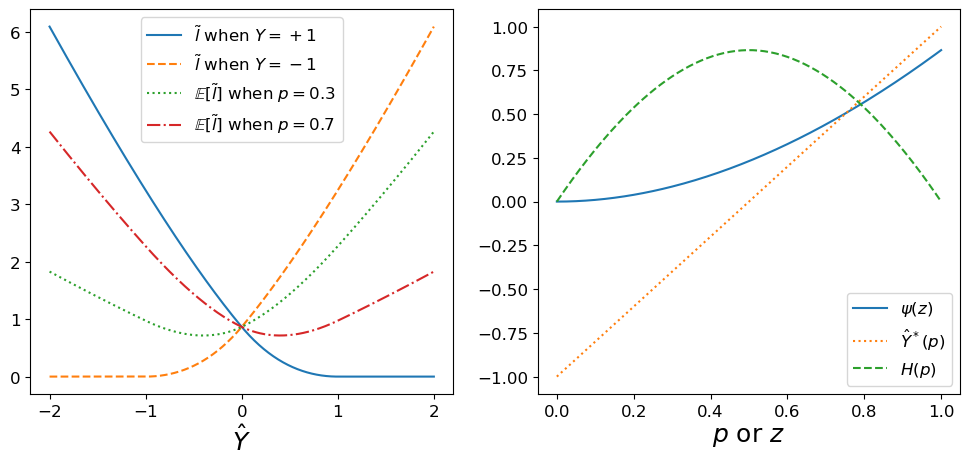

In [205]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.plot(hat_y_grid, loss_2_p10, label = r'$\tilde{l}$ when $Y=+1$', linestyle = 'solid')
ax1.plot(hat_y_grid, loss_2_p00, label = r'$\tilde{l}$ when $Y=-1$', linestyle = 'dashed')
ax1.plot(hat_y_grid, loss_2_p03, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.3$', linestyle = 'dotted')
ax1.plot(hat_y_grid, loss_2_p07, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.7$', linestyle = 'dashdot')

ax2.plot(p_grid, psi_2, label = r'$\psi(z)$', linestyle = 'solid')
ax2.plot(p_grid, opt_est_2, label = r'$\hat{Y}^*(p)$', linestyle = 'dotted')
ax2.plot(p_grid, H_2, label = r'$H(p)$', linestyle = 'dashed')


ax1.legend(fontsize=12)
ax1.set_xlabel(r'$\hat{Y}$', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)
ax2.legend(fontsize=12)
ax2.set_xlabel(r'$p$ or $z$', fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=12)

plt.savefig("Raj2022.jpg", bbox_inches='tight')
plt.savefig("Raj2022.eps", bbox_inches='tight')
plt.show()

# Example 3 Tifrea et al. 2022

In [2]:
def surrogate_loss_3(score, gamma):
    result = np.log(1.0 + np.exp(-score))
    index = score > gamma
    result[index] = np.log(1.0 + np.exp(-gamma))
    index = score < -gamma
    result[index] = np.log(1.0 + np.exp(gamma))
    return result

In [3]:
def optimal_estimation_3(p, gamma):
    result = np.zeros(shape = p.shape)
    result = np.log(p) - np.log(1.0 - p)
    index = result > gamma
    result[index] = gamma
    index = result < -gamma
    result[index] = -gamma
    return result

In [10]:
def min_loss_3(p, gamma):
    result = np.zeros(shape = p.shape)
    result = -(xlogy(p, p) + xlogy(1.0 - p, 1.0 - p))
    index = p > (np.exp(gamma) / (1.0 + np.exp(gamma)))
    result[index] = np.log(1.0 + np.exp(-gamma)) * p[index] + np.log(1.0 + np.exp(gamma)) * (1.0 - p[index])
    index = p < (1.0 / (1.0 + np.exp(gamma)))
    result[index] = np.log(1.0 + np.exp(-gamma)) * (1.0 - p[index]) + np.log(1.0 + np.exp(gamma)) * p[index]
    return result

In [5]:
def link_func_3(z, gamma):
    result = np.zeros(shape = z.shape)
    result = 0.5 * (xlogy(1.0 + z, 1.0 + z) + xlogy(1.0 - z, 1.0 - z))
    z_0 = 2.0 / (np.exp(gamma / (1.0 + np.exp(gamma))) + np.exp(-gamma / (1.0 + np.exp(-gamma))))
#     print(z_0)
    index = z > z_0
    result[index] = 0.5 * (xlogy(1.0 + z[index], 1.0 + z_0) + xlogy(1.0 - z[index], 1.0 - z_0))
    return result

In [6]:
hat_y_grid = np.linspace(-2.0, 2.0, 400 + 1)
p_grid = np.linspace(0.0, 1.0, 200 + 1)

In [7]:
gamma = 1.5
loss_3_p10 = surrogate_loss_3(1.0 * hat_y_grid, gamma)
# loss_3_p10 -= loss_3_p10.min()
loss_3_p00 = surrogate_loss_3(-1.0 * hat_y_grid, gamma)
# loss_3_p00 -= loss_3_p00.min()
p = 0.3
loss_3_p03 = p * loss_3_p10 + (1 - p) * loss_3_p00
p = 0.7
loss_3_p07 = p * loss_3_p10 + (1 - p) * loss_3_p00

In [11]:
opt_est_3 = optimal_estimation_3(p_grid, gamma)
H_3 = min_loss_3(p_grid, gamma)
psi_3 = link_func_3(p_grid, gamma)

C:\Users\Shang Liu\AppData\Local\Temp\ipykernel_10996\2037773309.py:3: RuntimeWarning: divide by zero encountered in log
  result = np.log(p) - np.log(1.0 - p)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


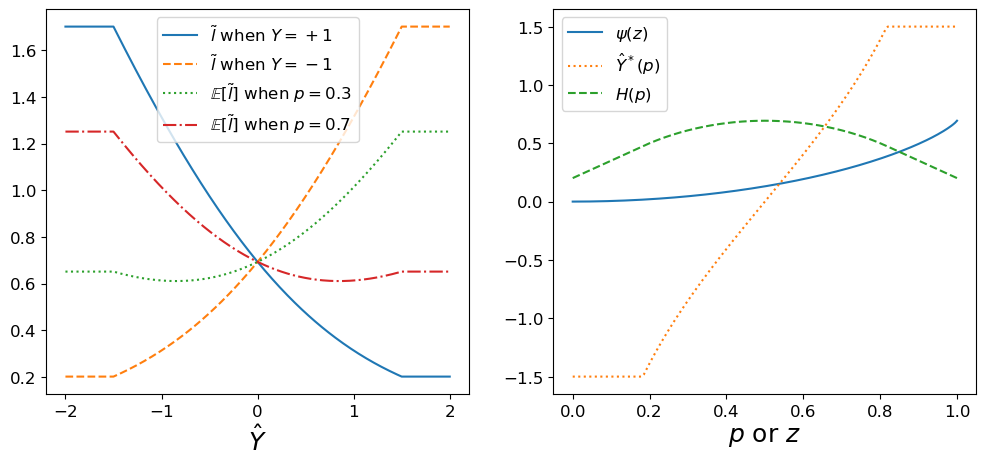

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.plot(hat_y_grid, loss_3_p10, label = r'$\tilde{l}$ when $Y=+1$', linestyle = 'solid')
ax1.plot(hat_y_grid, loss_3_p00, label = r'$\tilde{l}$ when $Y=-1$', linestyle = 'dashed')
ax1.plot(hat_y_grid, loss_3_p03, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.3$', linestyle = 'dotted')
ax1.plot(hat_y_grid, loss_3_p07, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.7$', linestyle = 'dashdot')

ax2.plot(p_grid, psi_3, label = r'$\psi(z)$', linestyle = 'solid')
ax2.plot(p_grid, opt_est_3, label = r'$\hat{Y}^*(p)$', linestyle = 'dotted')
ax2.plot(p_grid, H_3, label = r'$H(p)$', linestyle = 'dashed')


ax1.legend(fontsize=12)
ax1.set_xlabel(r'$\hat{Y}$', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)
ax2.legend(fontsize=12)
ax2.set_xlabel(r'$p$ or $z$', fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=12)

plt.savefig("Tifrea2022.jpg", bbox_inches='tight')
plt.savefig("Tifrea2022.eps", bbox_inches='tight')
plt.show()

# Example 4

In [13]:
def surrogate_loss_4(score, mu):
    result = np.zeros(shape = score.shape)
    index = score >= 0
    result[index] = np.exp(-(1.0 + mu) * score[index]) / (1.0 + mu) + mu / (1.0 + mu)
    index = score < 0
    result[index] = np.exp(-(1.0 - mu) * score[index]) / (1.0 - mu) - mu / (1.0 - mu)
    return result

In [14]:
def optimal_estimation_4(p, mu):
    return 0.5 * (np.log(p) - np.log(1.0 - p))

In [15]:
def min_loss_4(p, mu):
    result = np.zeros(shape = p.shape)
    index = p >= 0.5
    result[index] = 2.0 / (1.0 - mu ** 2) * np.multiply(np.power(p[index], 0.5 * (1.0 - mu)), np.power(1.0 - p[index], 0.5 * (1.0 + mu))) + mu / (1.0 - mu ** 2) * (2.0 * p[index] - 1.0 - mu)
    index = p < 0.5
    result[index] = 2.0 / (1.0 - mu ** 2) * np.multiply(np.power(1.0 - p[index], 0.5 * (1.0 - mu)), np.power(p[index], 0.5 * (1.0 + mu))) + mu / (1.0 - mu ** 2) * (1.0 - 2.0 * p[index] - mu)
    return result - result.min()

In [16]:
def link_func_4(z, mu):
    return (1 - mu * z - np.multiply(np.power(1.0 - z, 0.5 * (1.0 + mu)), np.power(1.0 + z, 0.5 * (1.0 - mu)))) / (1.0 - mu ** 2)

In [17]:
hat_y_grid = np.linspace(-2.0, 2.0, 400 + 1)
p_grid = np.linspace(0.0, 1.0, 200 + 1)

In [18]:
mu = 0.5
loss_4_p10 = surrogate_loss_4(1.0 * hat_y_grid, mu)
# loss_4_p10 -= loss_4_p10.min()
loss_4_p00 = surrogate_loss_4(-1.0 * hat_y_grid, mu)
# loss_4_p00 -= loss_4_p00.min()
p = 0.3
loss_4_p03 = p * loss_4_p10 + (1 - p) * loss_4_p00
p = 0.7
loss_4_p07 = p * loss_4_p10 + (1 - p) * loss_4_p00

In [19]:
opt_est_4 = optimal_estimation_4(p_grid, mu)
H_4 = min_loss_4(p_grid, mu)
psi_4 = link_func_4(p_grid, mu)

C:\Users\Shang Liu\AppData\Local\Temp\ipykernel_10996\942833759.py:2: RuntimeWarning: divide by zero encountered in log
  return 0.5 * (np.log(p) - np.log(1.0 - p))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


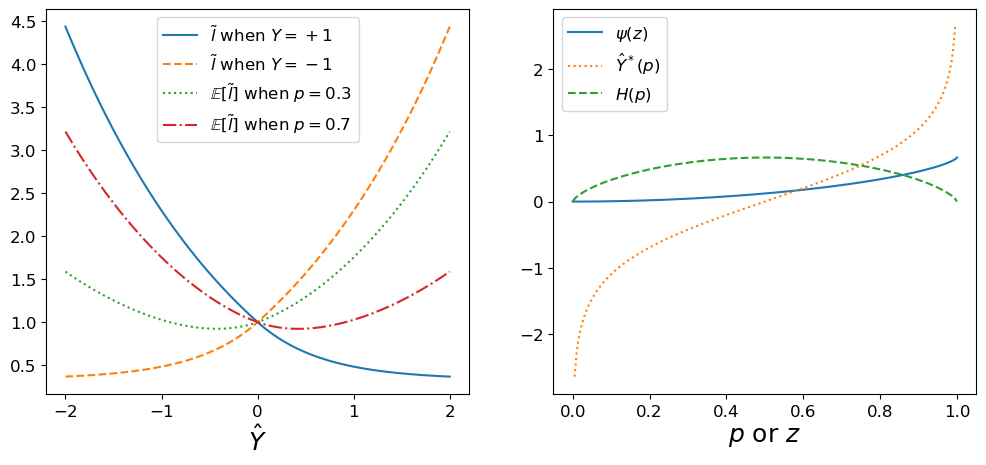

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.plot(hat_y_grid, loss_4_p10, label = r'$\tilde{l}$ when $Y=+1$', linestyle = 'solid')
ax1.plot(hat_y_grid, loss_4_p00, label = r'$\tilde{l}$ when $Y=-1$', linestyle = 'dashed')
ax1.plot(hat_y_grid, loss_4_p03, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.3$', linestyle = 'dotted')
ax1.plot(hat_y_grid, loss_4_p07, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.7$', linestyle = 'dashdot')

ax2.plot(p_grid, psi_4, label = r'$\psi(z)$', linestyle = 'solid')
ax2.plot(p_grid, opt_est_4, label = r'$\hat{Y}^*(p)$', linestyle = 'dotted')
ax2.plot(p_grid, H_4, label = r'$H(p)$', linestyle = 'dashed')


ax1.legend(fontsize=12)
ax1.set_xlabel(r'$\hat{Y}$', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)
ax2.legend(fontsize=12)
ax2.set_xlabel(r'$p$ or $z$', fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=12)

plt.savefig("Exponential.jpg", bbox_inches='tight')
plt.savefig("Exponential.eps", bbox_inches='tight')
plt.show()

# Example 5

In [98]:
def surrogate_loss_5(score, mu):
    result = np.zeros(shape = score.shape)
    C = np.log(1.0 + mu) / mu
    index = score > 0
    result[index] = -np.log(1.0 + mu * score[index]) / mu + C
    index = score <= 0
    result[index] = np.log(1.0 - mu * score[index]) / mu + C
    result[score >= 1] = 0
    return result

In [214]:
def optimal_estimation_5(p, mu):
    result = np.zeros(shape = p.shape)
    index = p > 0.5
    result[index] = 1.0
    index = p < 0.5
    result[index] = -1.0
    index = p == 0.5
    result[index] = np.nan
    return result

In [124]:
def min_loss_5(p, mu):
    result = np.zeros(shape = p.shape)
    index = p >= 0.5
    result[index] = (1 - p[index]) * 2 * np.log(1 + mu) / mu
    index = p < 0.5
    result[index] = p[index] * 2 * np.log(1 + mu) / mu
    return result - result.min()

In [119]:
def link_func_5(z, mu):
    return z * np.log(1.0 + mu) / mu

In [215]:
hat_y_grid = np.linspace(-2.0, 2.0, 400 + 1)
p_grid = np.linspace(0.0, 1.0, 200 + 1)

In [216]:
mu = 1.0
loss_5_p10 = surrogate_loss_5(1.0 * hat_y_grid, mu)
loss_5_p10 -= loss_5_p10.min()
loss_5_p00 = surrogate_loss_5(-1.0 * hat_y_grid, mu)
loss_5_p00 -= loss_5_p00.min()
p = 0.3
loss_5_p03 = p * loss_5_p10 + (1 - p) * loss_5_p00
p = 0.7
loss_5_p07 = p * loss_5_p10 + (1 - p) * loss_5_p00

In [217]:
opt_est_5 = optimal_estimation_5(p_grid, mu)
H_5 = min_loss_5(p_grid, mu)
psi_5 = link_func_5(p_grid, mu)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


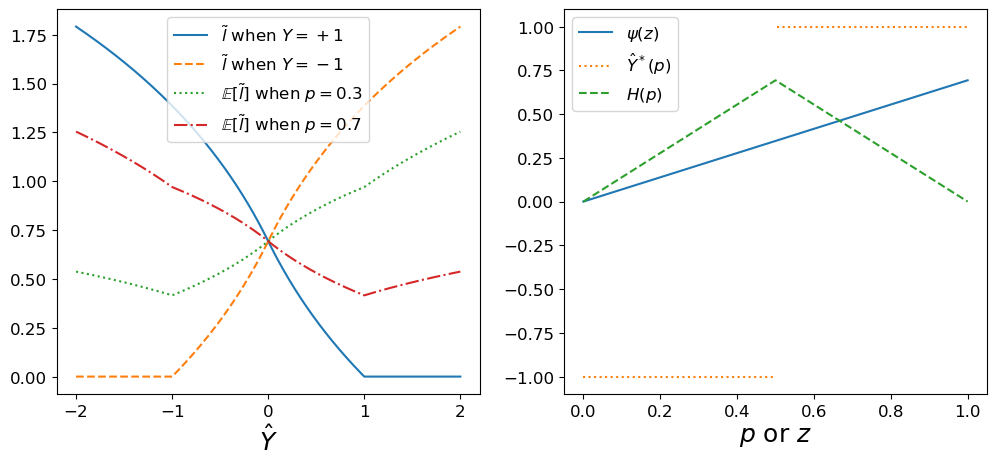

In [218]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
# fig.suptitle(r'Example 5, Margin Loss with Uncertainty in Raj and Bach 2022, $\mu = 1.0$')

ax1.plot(hat_y_grid, loss_5_p10, label = r'$\tilde{l}$ when $Y=+1$', linestyle = 'solid')
ax1.plot(hat_y_grid, loss_5_p00, label = r'$\tilde{l}$ when $Y=-1$', linestyle = 'dashed')
ax1.plot(hat_y_grid, loss_5_p03, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.3$', linestyle = 'dotted')
ax1.plot(hat_y_grid, loss_5_p07, label = r'$\mathbb{E}[\tilde{l}]$ when $p=0.7$', linestyle = 'dashdot')

ax2.plot(p_grid, psi_5, label = r'$\psi(z)$', linestyle = 'solid')
ax2.plot(p_grid, opt_est_5, label = r'$\hat{Y}^*(p)$', linestyle = 'dotted')
ax2.plot(p_grid, H_5, label = r'$H(p)$', linestyle = 'dashed')


ax1.legend(fontsize=12)
ax1.set_xlabel(r'$\hat{Y}$', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)
ax2.legend(fontsize=12)
ax2.set_xlabel(r'$p$ or $z$', fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=12)

plt.savefig("Hinge.jpg", bbox_inches='tight')
plt.savefig("Hinge.eps", bbox_inches='tight')
plt.show()